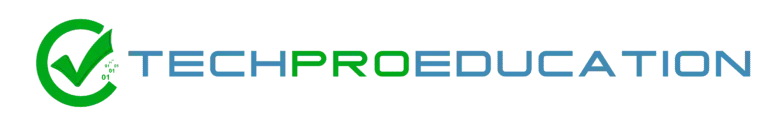

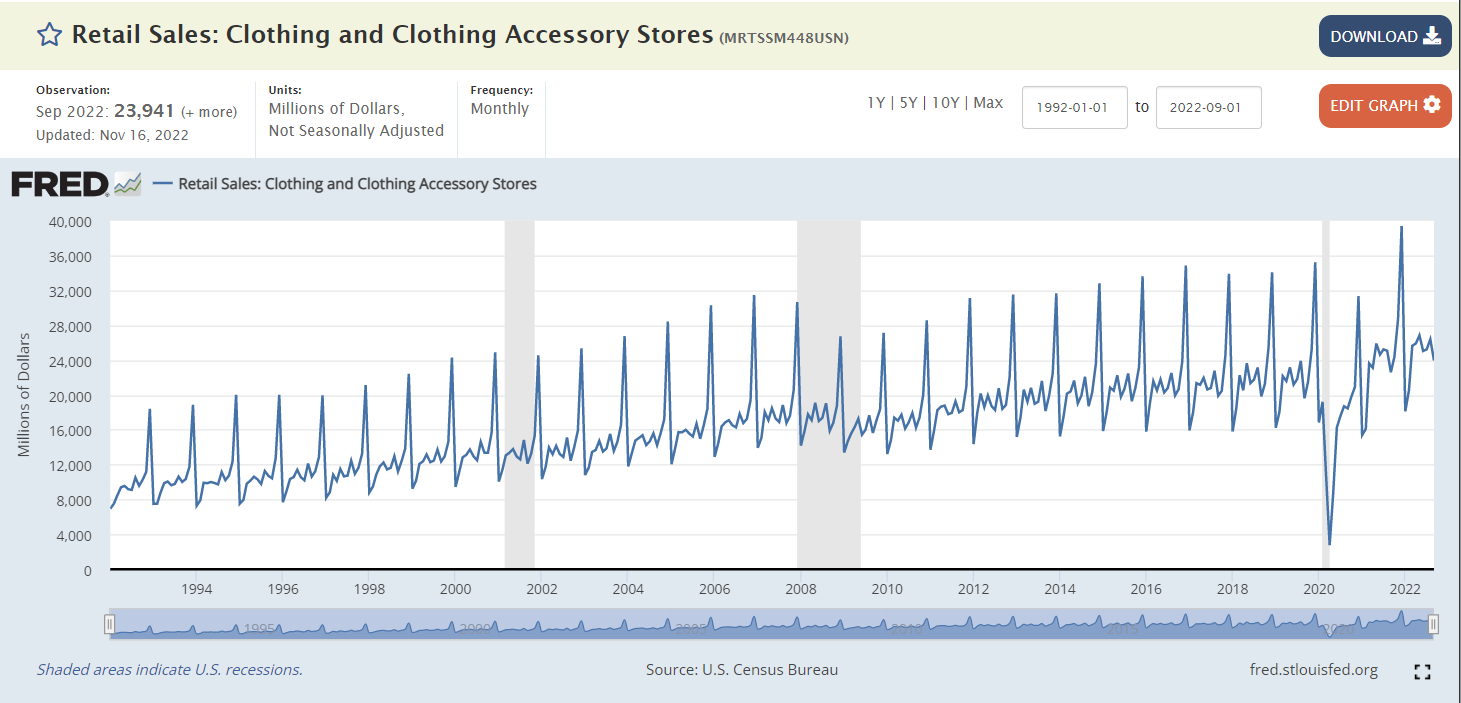

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

Bu veri, ABD'nin perakende ve gıda hizmetleri sektöründeki aylık satışlarla ilgilidir. 

"Aylık Perakende Ticaret ve Gıda Hizmetleri" verileri, perakende sektöründeki satışlar ve gıda hizmetleri faaliyetleriyle ilgili aylık verileri ifade eder. Bu veriler, tüketici harcamalarının ve ekonomik aktivitenin bir göstergesi olarak kullanılır.

Bu veriler, ABD'nin perakende sektöründeki satışları ve gıda hizmetleri faaliyetlerini kapsar. Satışlar milyonlarca dolar cinsinden ifade edilir ve mevsimsel düzeltme yapılmamıştır, yani mevsimsel etkilerin etkisi veriden çıkarılmamıştır.

Aylık perakende ticaret ve gıda hizmetleri verileri, Federal Reserve Bankası'nın FRED veritabanında bulunabilir ve düzenli olarak güncellenmektedir. Bu veriler, ekonomi analizi, trendleri değerlendirme ve tüketici harcamalarının izlenmesi gibi birçok amaçla kullanılabilir.

# RNN (Time Series)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('RSCCASN.csv',
                 index_col='DATE',
                 parse_dates=True
                )

In [3]:
df.head()

RSCCASN
DATE               
1992-01-01     6938
1992-02-01     7524
1992-03-01     8475
1992-04-01     9401
1992-05-01     9558

In [4]:
df.tail()

RSCCASN
DATE               
2019-06-01    21123
2019-07-01    21714
2019-08-01    23791
2019-09-01    19695
2019-10-01    21113

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [6]:
df.columns = ['Sales']

In [7]:
df.head()

Sales
DATE             
1992-01-01   6938
1992-02-01   7524
1992-03-01   8475
1992-04-01   9401
1992-05-01   9558

<Axes: xlabel='DATE'>

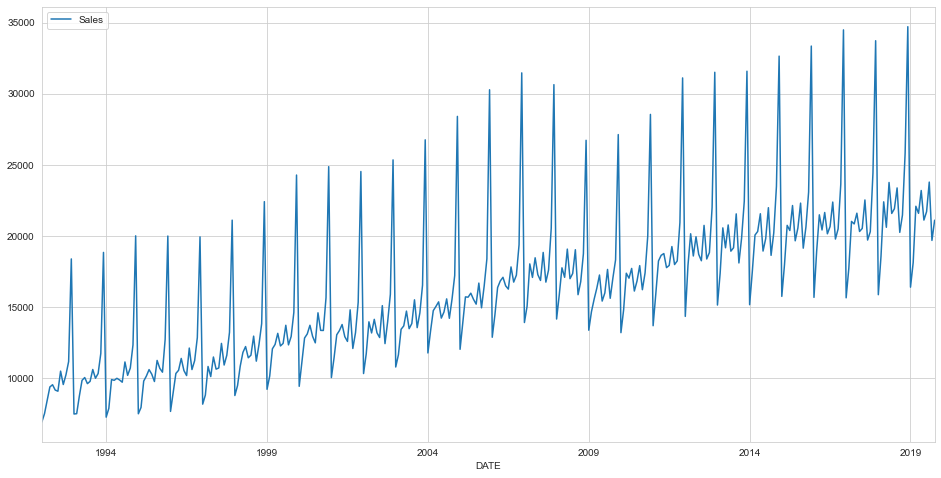

In [8]:
df.plot(figsize=(16,8))

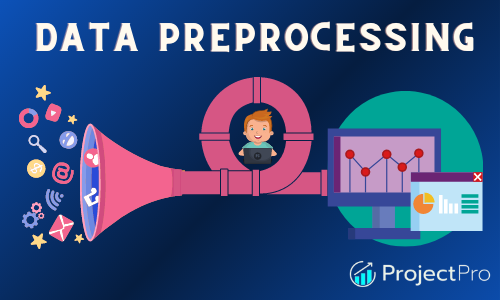

## Preprocessing of Data

### Train Test Split

In [9]:
len(df)

334

In [10]:
test_size = 24

In [11]:
test_index = len(df)- test_size
test_index

310

In [12]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [13]:
len(train)

310

In [14]:
len(test)

24

In [15]:
train

Sales
DATE             
1992-01-01   6938
1992-02-01   7524
1992-03-01   8475
1992-04-01   9401
1992-05-01   9558
...           ...
2017-06-01  20322
2017-07-01  20535
2017-08-01  22536
2017-09-01  19720
2017-10-01  20307

[310 rows x 1 columns]

In [16]:
test

Sales
DATE             
2017-11-01  24438
2017-12-01  33720
2018-01-01  15881
2018-02-01  18585
2018-03-01  22404
2018-04-01  20616
2018-05-01  23764
2018-06-01  21589
2018-07-01  21919
2018-08-01  23381
2018-09-01  20260
2018-10-01  21473
2018-11-01  25831
2018-12-01  34706
2019-01-01  16410
2019-02-01  18134
2019-03-01  22093
2019-04-01  21597
2019-05-01  23200
2019-06-01  21123
2019-07-01  21714
2019-08-01  23791
2019-09-01  19695
2019-10-01  21113

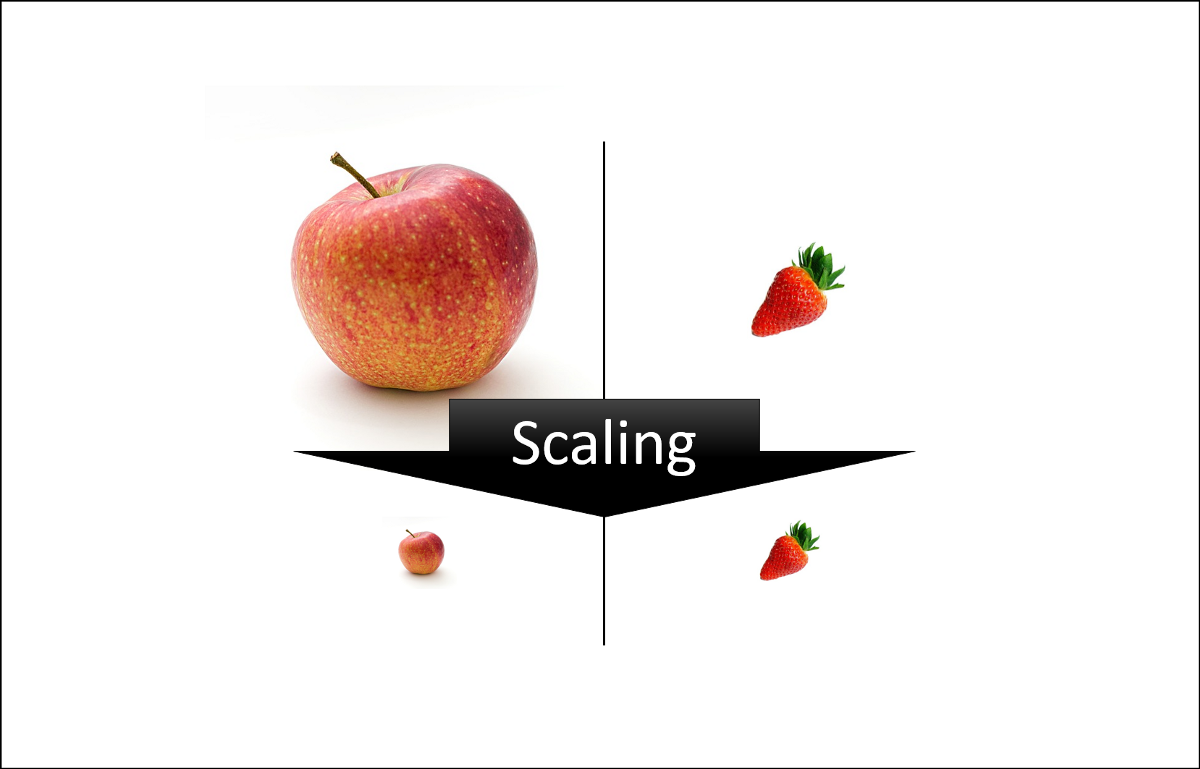

### Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

Bu kod parçası, veri önişleme adımında yer almaktadır. scaler adlı bir ölçekleyici nesnesi kullanılarak, eğitim ve test verileri ölçeklendirilmektedir.

fit_transform() yöntemi, scaler nesnesini eğitim verilerine uygulayarak verileri ölçeklendirir ve dönüştürür. Eğitim verileri üzerinde ölçeklendirme işlemi yapılırken, ölçekleyici nesne eğitim verilerine uyum sağlamak için verileri analiz eder ve istatistiksel bilgileri kullanarak verileri ölçeklendirir.

Daha sonra, transform() yöntemi kullanılarak aynı ölçekleyici nesne, test verilerine uygulanır. Bu durumda, ölçekleyici nesne, eğitim verilerine dayalı olarak öğrendiği ölçekleme faktörlerini kullanarak test verilerini ölçeklendirir. Bu şekilde, eğitim ve test verileri aynı ölçeklendirme faktörlerine göre uygun bir şekilde dönüştürülür.

Bu işlem, verilerin ölçeklendirilerek aynı aralığa getirilmesini sağlar. Ölçeklendirme, modelin daha iyi performans göstermesine ve daha istikrarlı sonuçlar üretmesine yardımcı olabilir.

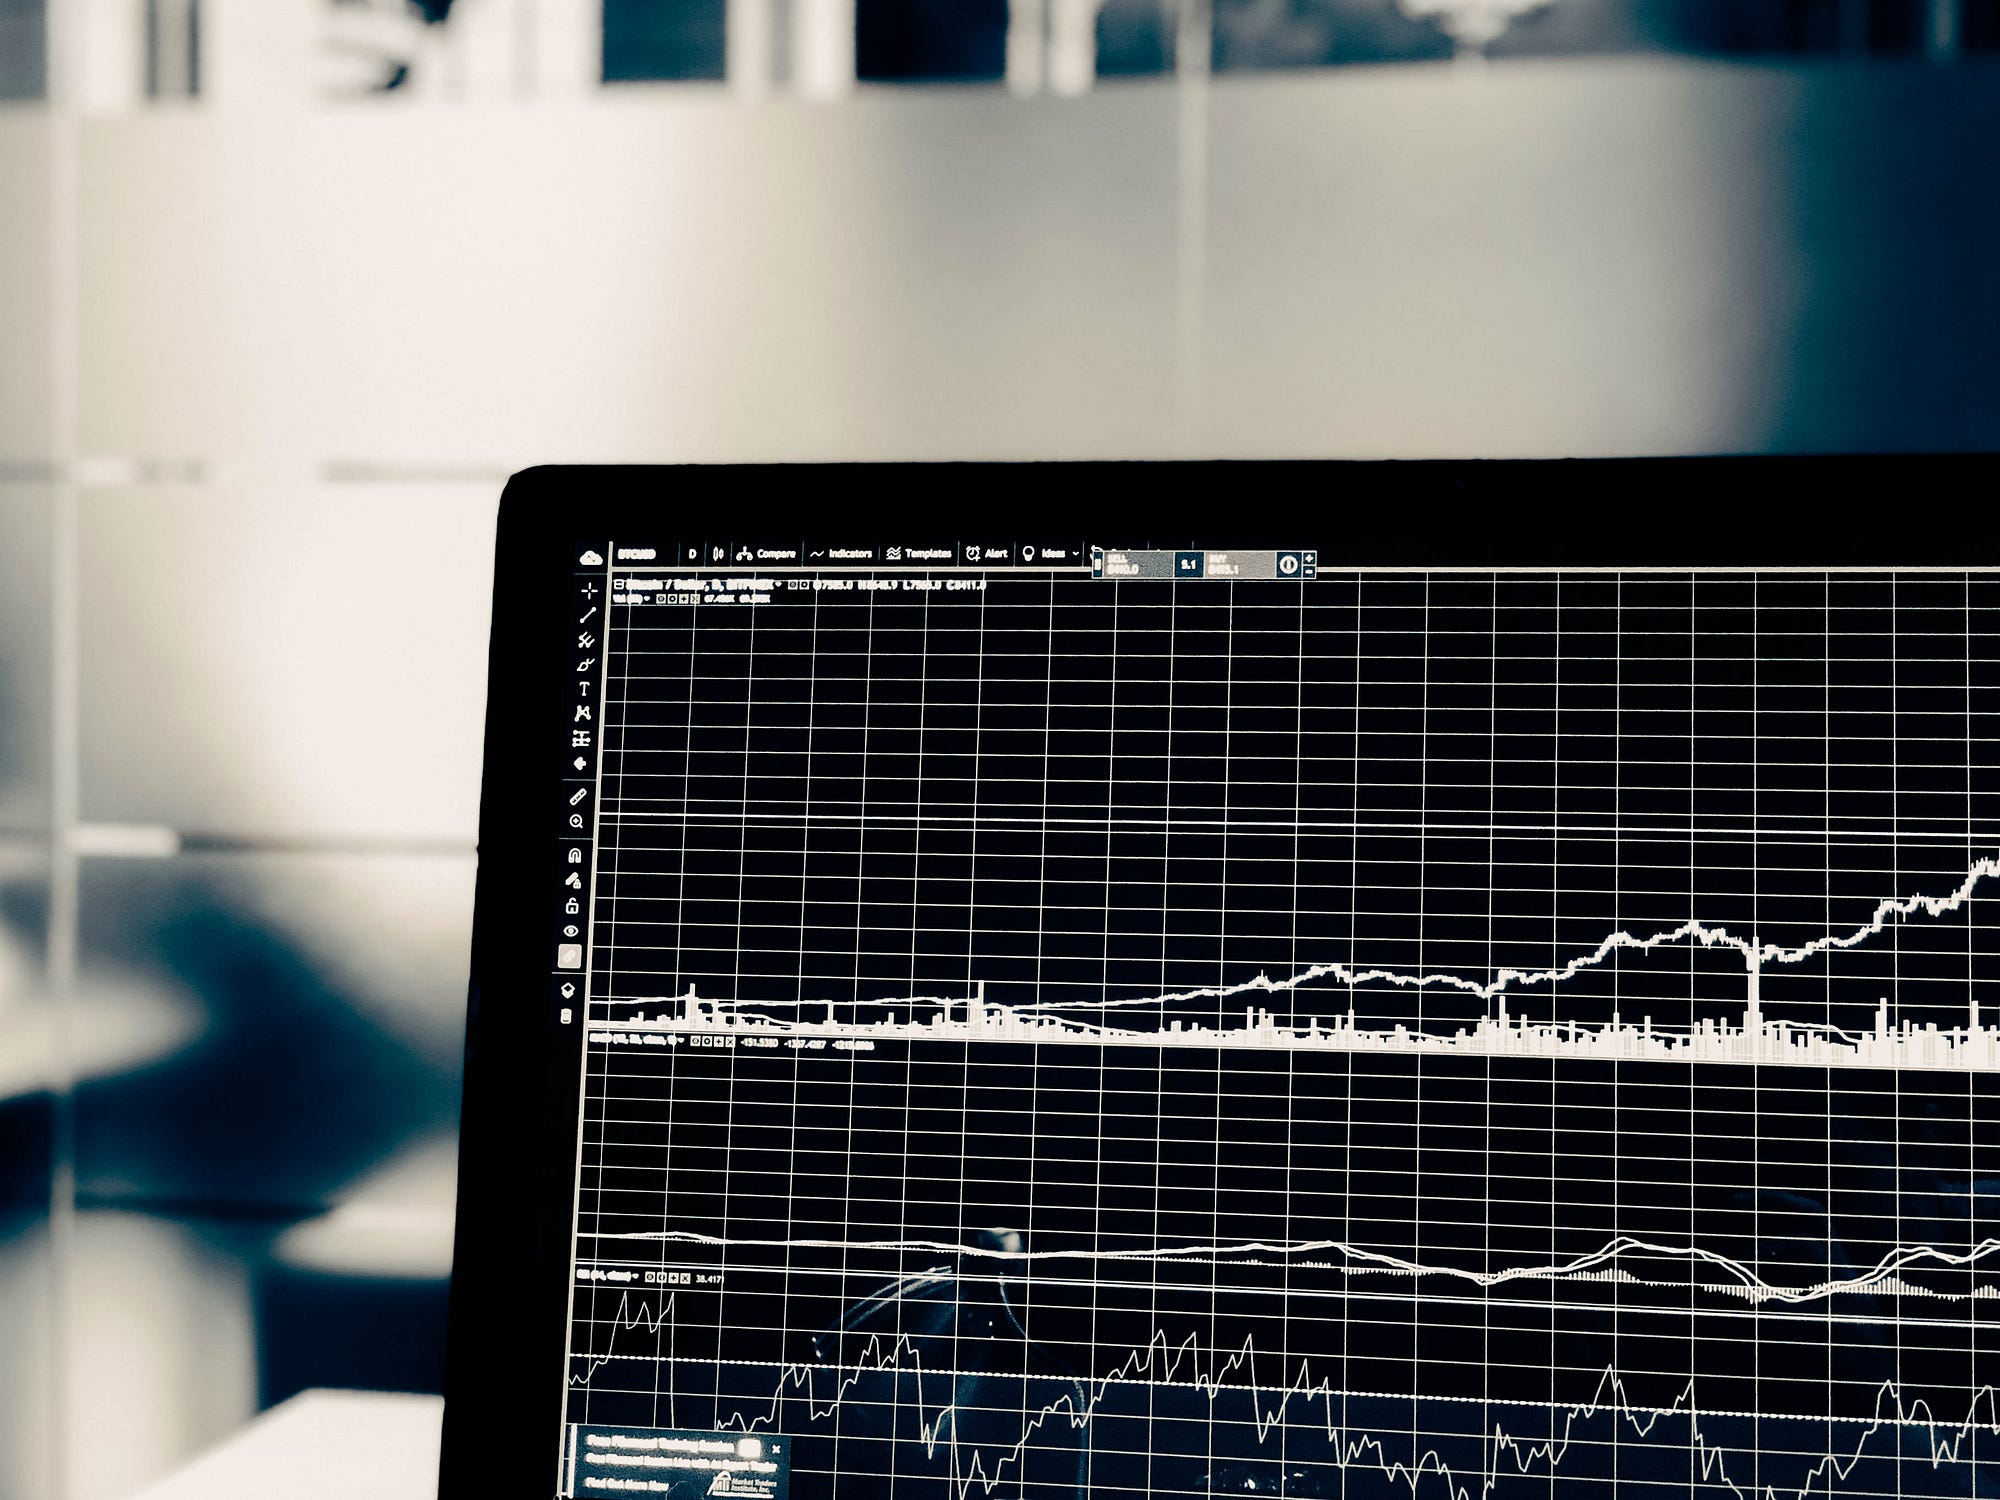

## Time Series Generator


TimeSeriesGenerator, RNN (Recurrent Neural Network) modelleri için zaman serisi verilerinin işlenmesini kolaylaştıran bir araçtır.

RNN modelleri, geçmiş zaman adımlarına dayalı olarak geleceği tahmin etmek için kullanılır. TimeSeriesGenerator, veri setini zaman serisi pencerelemesi yaparak önceden belirlenen uzunluktaki örneklerle eşleştirir. Bu pencerelemeye dayalı olarak, girdi ve hedef verileri oluşturulur.

Yukarıdaki kodda, TimeSeriesGenerator kullanılarak eğitim verileri için bir jeneratör oluşturulmaktadır. train_scaled veri seti hem girdi (X) hem de hedef (y) veri olarak kullanılmaktadır. length parametresi, her bir zaman serisi örneğinin uzunluğunu belirtir. Yani, her bir örnek, length adet geçmiş zaman adımını içerir ve bir sonraki zaman adımını tahmin etmek için kullanılır.

batch_size ise oluşturulan örneklerin kaçarlı gruplara bölüneceğini belirler. Bu sayede eğitim sırasında modelin daha verimli çalışması sağlanır.

TimeSeriesGenerator, eğitim sürecinde verilerin otomatik olarak örneklere ayrılmasını sağlar ve her bir eğitim adımında bir örnek gruplaştırılır. Bu sayede RNN modeli, zaman serisi verileri üzerinde daha etkili bir şekilde çalışabilir ve geçmiş zamana dayalı tahminler yapabilir.

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

TimeseriesGenerator sınıfı, zaman serisi verilerinin toplu halde eğitim ve doğrulama için kullanılabilmesini sağlayan bir yardımcı sınıftır. Bu sınıf, veri noktalarının eşit aralıklarla toplandığı bir dizi veri noktasıyla birlikte zaman serisi parametreleri alarak, eğitim/doğrulama için toplu veriler üretir.

Sınıfın kurucusu, verileri, hedefleri, çıktı dizilerinin uzunluğunu, örnekleme oranını, adım büyüklüğünü, başlangıç ve bitiş indekslerini, karıştırma seçeneğini, ters sıralama seçeneğini ve toplu veri boyutunu alır. Bu parametrelerle, zaman serisi verileri ve hedeflerinden toplu veri örnekleri üretilir.

In [21]:
length = 12    # 12 tane satır al 13'üncüyü tahmin et..
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)   # shuffle= false

Verilen kod parçasında TimeseriesGenerator'ın ilk argümanı olarak iki kez train_scaled kullanılmasının nedeni, bu jeneratörün girdi ve hedef verilerini eşleştirmesi gerektiğinden kaynaklanır. TimeseriesGenerator zaman serisi verileri ile çalışırken, bir örneklem dizisi oluştururken girdi ve hedef verileri arasındaki ilişkiyi sürdürmelidir.

İşte bu kod parçasının mantığı:

İlk train_scaled argümanı, jeneratör tarafından kullanılan girdi verisini temsil eder. Yani, bu veri dizisi, zaman serisi verilerinin belirli bir penceresini (belirtilen "length" uzunluğu kadar) alır ve bunu tahmin etmek için kullanılır.

İkinci train_scaled argümanı, jeneratör tarafından kullanılan hedef veriyi temsil eder. Bu, ilk adımda seçilen pencerenin sonraki zaman adımındaki değeri temsil eder. Yani, girdi penceresi sonraki değeri tahmin etmek için kullanılır.

Bu nedenle, bu iki argümanın aynı olması, girdi ve hedef verileri arasındaki ilişkiyi sağlar. Bu şekilde, model eğitimi sırasında, zaman serisi verilerini öğrenirken doğru girdi ve hedef ilişkisini korur.


Batch boyutu, bir seferde işlenecek örnek sayısını belirtir. Burada batch_size = 1 olarak ayarlandığında, her bir veri örneği ayrı ayrı işlenir. Yani her bir veri noktası tek başına bir örnektir ve tahmin edilecek sonraki veri noktası sadece bu tek örneğe dayanarak yapılır.

Bu durumda, her bir zaman serisi örneği ayrı ayrı işlendiği için her iterasyonda model güncellenir ve ağırlık güncellemeleri tek bir örnekleme üzerinden yapılır. Batch boyutu 1 olarak seçildiğinde, modelin her adımda tek bir örnekle eğitilmesi ve tahmin yapması sağlanır.

Batch boyutu, bellek kullanımı ve hesaplama süresi arasında bir denge sağlamak için ayarlanabilir. Daha büyük batch boyutları, daha hızlı hesaplama süreleri sağlayabilir, ancak daha fazla bellek kullanırken, daha küçük batch boyutları daha az bellek kullanırken daha uzun hesaplama süreleri gerektirebilir.

Bu örnekte, batch_size = 1 olarak ayarlandığından, her bir veri noktası ayrı ayrı işlenir ve tahmin edilecek sonraki veri noktası sadece bu tek örneğe dayanarak yapılır. Bu şekilde, her bir örneğin önceki veri noktaları üzerindeki etkisi izlenir ve daha kesin tahminler elde edilebilir.


Bu durumda, train_scaled iki kez kullanılmış çünkü TimeSeriesGenerator'a hem giriş verisi (X) olarak hem de hedef verisi (y) olarak aynı train_scaled veri kümesi sağlanıyor.

TimeSeriesGenerator, bir dizi veri noktasından oluşan bir giriş dizisi (X) ve bunlara karşılık gelen bir hedef değer dizisi (y) oluşturmak için kullanılır. Burada, train_scaled hem giriş verisi hem de hedef verisi olarak kullanıldığı için iki kez belirtiliyor. Bu şekilde, TimeSeriesGenerator, giriş verilerini kullanarak gelecekteki hedef değerlerini tahmin etmek için eğitilecek ve modelin öğrenmesini sağlayacaktır.

In [22]:
#310-12 = 298 (batch size= 1 ve stride= 1 olduğu için)

In [23]:
len(generator)

298

In [24]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [25]:
X, y = generator[0]

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


TimeSeriesGenerator, RNN modelleri için uygun formatta veri örneklerini oluşturur ve tahmin yapılmasını sağlar. RNN modelleri ise bu örnekleri kullanarak öğrenme sürecini gerçekleştirir ve tahminleri yapar.

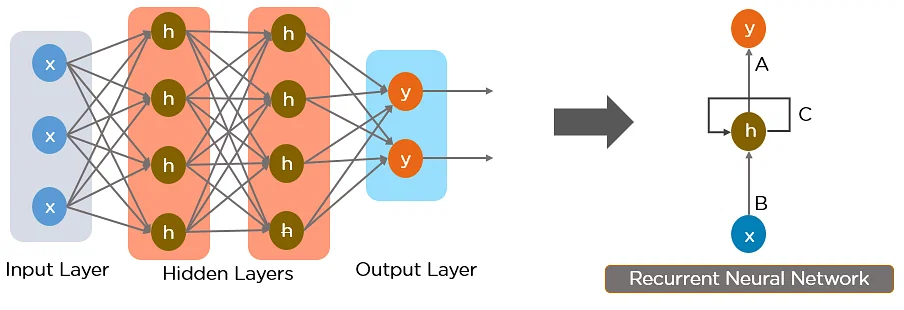

## Modelling

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [28]:
train_scaled.shape

(310, 1)

In [29]:
n_features = train_scaled.shape[1]
n_features


1

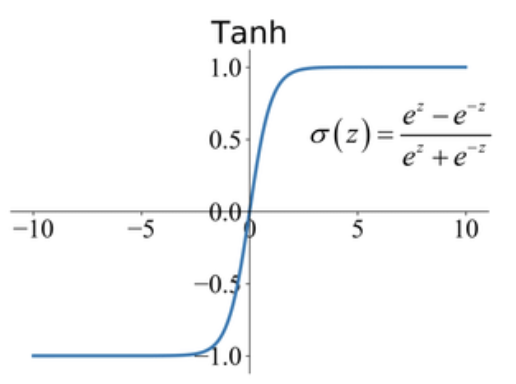

In [30]:
from keras.layers import Dropout

model = Sequential()
model.add(SimpleRNN(units=100, activation="tanh", input_shape=(length, n_features)))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(Dense(64, activation="relu"))  # Aktivasyon fonksiyonu olarak "relu" kullanıldı
model.add(Dense(32, activation="tanh"))  # Aktivasyon fonksiyonu olarak "tanh" kullanıldı
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [31]:
# return_sequences= iki Rnn arka arkaya gelince sequence leri unutmasın diye bunu veriyoruz. 

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 18,777
Trainable params: 18,777
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping and Validation Generator

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 15)

In [35]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [36]:
len(validation_generator)

12

In [37]:
model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
298/298 [==============================] - 3s 6ms/step - loss: 0.0118 - val_loss: 0.0174
Epoch 2/20
298/298 [==============================] - 1s 4ms/step - loss: 0.0077 - val_loss: 0.0059
Epoch 3/20
298/298 [==============================] - 1s 5ms/step - loss: 0.0047 - val_loss: 0.0029
Epoch 4/20
298/298 [==============================] - 1s 4ms/step - loss: 0.0053 - val_loss: 0.0124
Epoch 5/20
298/298 [==============================] - 1s 4ms/step - loss: 0.0046 - val_loss: 0.0093
Epoch 6/20
298/298 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 0.0129
Epoch 7/20
298/298 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 0.0074
Epoch 8/20
298/298 [==============================] - 1s 4ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 9/20
298/298 [==============================] - 1s 4ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 10/20
298/298 [==============================] - 1s 4ms/step - loss: 0.0038 - val_loss: 0.0020

<Axes: >

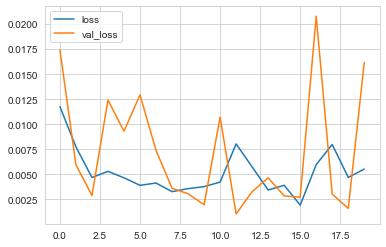

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

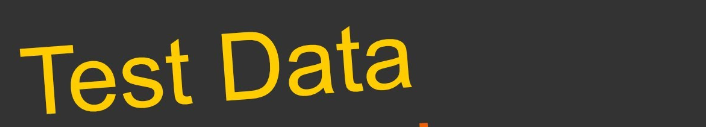

## Evaluate on Test Data

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    return print("\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [41]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [42]:
current_pred

array([[0.39603174]], dtype=float32)

In [43]:
current_batch

array([[[0.49424344],
        [0.66888362],
        [0.42992908],
        [0.43411446],
        [0.44593608],
        [0.4331708 ],
        [0.43021354],
        [0.41833967],
        [0.41650981],
        [0.41758338],
        [0.39473498],
        [0.39603174]]])

In [44]:
predictions_scaled

[array([0.49424344], dtype=float32),
 array([0.6688836], dtype=float32),
 array([0.42992908], dtype=float32),
 array([0.43411446], dtype=float32),
 array([0.44593608], dtype=float32),
 array([0.4331708], dtype=float32),
 array([0.43021354], dtype=float32),
 array([0.41833967], dtype=float32),
 array([0.4165098], dtype=float32),
 array([0.41758338], dtype=float32),
 array([0.39473498], dtype=float32),
 array([0.39603174], dtype=float32)]

In [45]:
eval_metrics(test_scaled[:length], predictions_scaled)


mae: 0.13013793883549649 
mse: 0.021647019145333093 
rmse: 0.14712925999043525


## Retrain and Forecasting - Create Final Model with full Data

Create Final model with full data" adımı, tüm veri seti üzerinde eğitilmiş bir final RNN modeli oluşturmak amacıyla kullanılır. Bu adımda, daha önce eğitilmiş olan modelin ağırlık değerleri korunarak, tüm veri seti kullanılarak model yeniden eğitilir.

Bu işlem genellikle, modelin daha genel bir veri setine uyarlanması veya daha fazla veriye erişilebilmesi durumunda yapılır. İlk eğitim aşamasında belirli bir veri alt kümesi kullanılmış olabilir, ancak daha fazla veriyle modelin performansının artması bekleniyorsa, bu adım gerçekleştirilir.

Böylece, "Create Final model with full data" adımı, modelin daha geniş bir veri setine uyarlanması ve performansının artırılması için kullanılır.

In [46]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [47]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [48]:
len(df)

334

In [49]:
len(generator)

322

In [50]:
model = Sequential()

model.add(SimpleRNN(units=100, activation="tanh", input_shape=(length, n_features)))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(Dense(64, activation="relu"))  # Aktivasyon fonksiyonu olarak "relu" kullanıldı
model.add(Dense(32, activation="tanh"))  # Aktivasyon fonksiyonu olarak "tanh" kullanıldı
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

model.fit_generator(generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 4s 4ms/step - loss: 0.0129
Epoch 2/15
322/322 [==============================] - 1s 4ms/step - loss: 0.0060
Epoch 3/15
322/322 [==============================] - 1s 4ms/step - loss: 0.0057
Epoch 4/15
322/322 [==============================] - 1s 3ms/step - loss: 0.0050
Epoch 5/15
322/322 [==============================] - 1s 4ms/step - loss: 0.0097
Epoch 6/15
322/322 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 7/15
322/322 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 8/15
322/322 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 9/15
322/322 [==============================] - 1s 3ms/step - loss: 0.0044
Epoch 10/15
322/322 [==============================] - 1s 3ms/step - loss: 0.0028
Epoch 11/15
322/322 [==============================] - 1s 3ms/step - loss: 0.0041
Epoch 12/15
322/322 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 13/15
322/322 [====

In [51]:
scaled_full_data.shape

(334, 1)

In [52]:
scaled_full_data[-length:].shape

(12, 1)

In [53]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

Bu kod örneği, bir zaman serisi verisi üzerinde LSTM tabanlı bir model kullanarak tahminlerde bulunma işlemi göstermektedir. Aşağıda kodun ne yaptığını adım adım açıklayacağım:

forecast = []: Tahminlerin saklanacağı boş bir liste oluşturulur.

first_eval_batch = scaled_full_data[-length:]: İlk tahmin için kullanılacak veri grubu, verinin sonundan başlayarak 'length' uzunluğunda bir dilimleme işlemiyle seçilir.

current_batch = first_eval_batch.reshape((1, length, n_features)): İlk tahmin için kullanılacak veri grubu, modele uygun bir şekilde yeniden şekillendirilir. LSTM modeli, (samples, timesteps, features) şeklinde bir giriş bekler. Bu nedenle veri grubu 3D bir diziye dönüştürülür.

for i in range(length):: Tahminleri yapmak için bir döngü başlatılır. Bu döngü, 'length' kadar kez çalışacaktır, yani gelecekteki belirli bir sayıda zaman adımı için tahminlerde bulunacak.

current_pred = model.predict(current_batch): LSTM modeli, mevcut veri grubu (current_batch) temel alarak bir sonraki zaman adımı için tahmini hesaplar.

forecast.append(current_pred[0]): Yapılan tahmin, forecast adlı listeye eklenir. Tahminler, modelin çıkış formatına göre bir liste içinde saklanır.

current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1): Veri grubu güncellenir. Bu, bir sonraki tahmin için kullanılacak veriyi oluşturur. Mevcut veri grubundan ilk zaman adımını çıkarır ve yeni tahmini son zaman adımına ekler.

Bu döngü, 'length' sayısı kadar kez çalışır ve her seferinde bir sonraki zaman adımı için bir tahmin üretir. Sonuç olarak, forecast listesi, zaman serisinin belirli bir uzunluğu için modelin tahminlerini içerir. Bu tahminler daha sonra kullanılabilir veya analiz edilebilir.

In [54]:
forecast = scaler.inverse_transform(forecast)

In [55]:
forecast

array([[22102.47353172],
       [29226.65374517],
       [17678.23054934],
       [18212.26812816],
       [20124.49847341],
       [19721.22795057],
       [20041.0991981 ],
       [19497.55506396],
       [19588.84951663],
       [20702.63839149],
       [17519.92887759],
       [18591.45253181]])

In [56]:
df

Sales
DATE             
1992-01-01   6938
1992-02-01   7524
1992-03-01   8475
1992-04-01   9401
1992-05-01   9558
...           ...
2019-06-01  21123
2019-07-01  21714
2019-08-01  23791
2019-09-01  19695
2019-10-01  21113

[334 rows x 1 columns]

In [57]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [58]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [59]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [60]:
forecast_df

Forecast
2019-11-01 22102.474
2019-12-01 29226.654
2020-01-01 17678.231
2020-02-01 18212.268
2020-03-01 20124.498
2020-04-01 19721.228
2020-05-01 20041.099
2020-06-01 19497.555
2020-07-01 19588.850
2020-08-01 20702.638
2020-09-01 17519.929
2020-10-01 18591.453

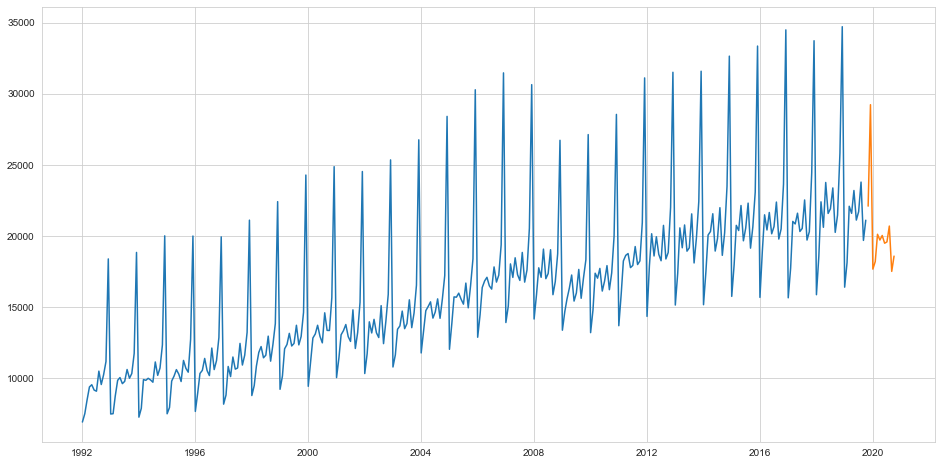

In [61]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

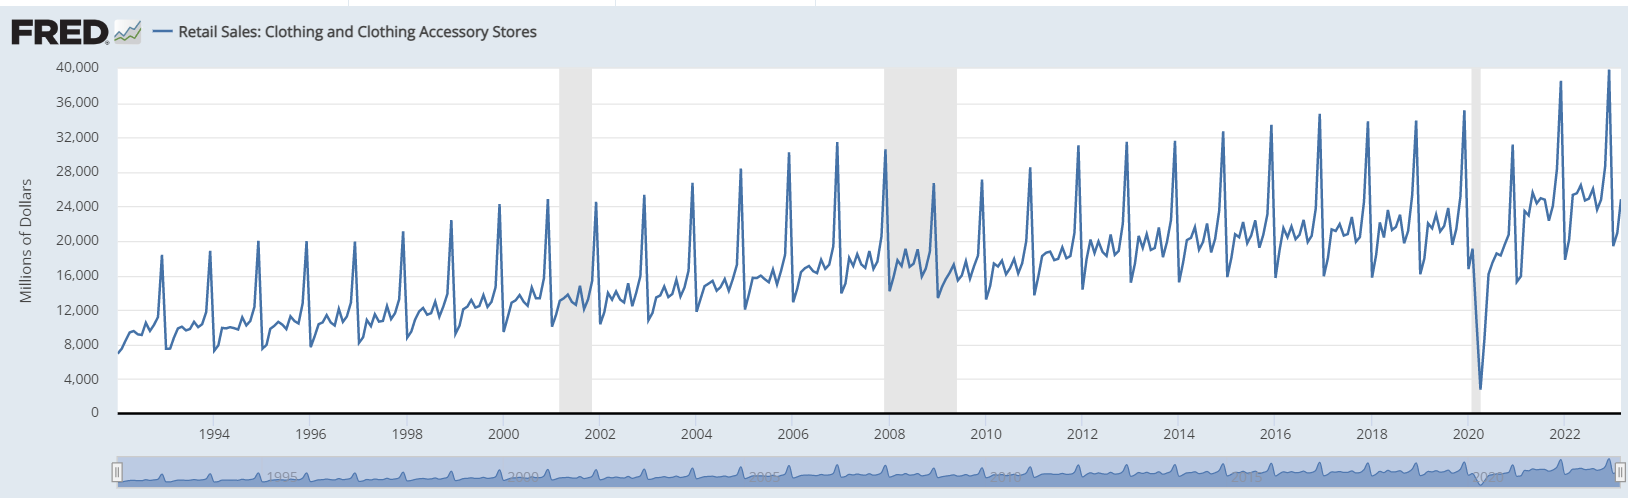

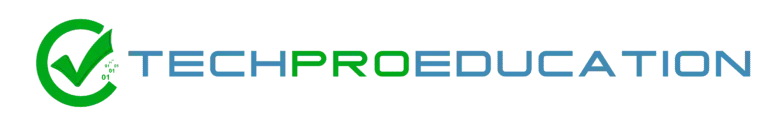

In [62]:
from keras.models import load_model

# Modeli kaydetme
model.save('final_model1.h5')